In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, minmax_scale, scale
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [2]:
#Preparar los datos
seed = 0
DATASETX = "./data/prep/HotelReservationsPreparedCleanX.csv"
DATASETY = "./data/prep/HotelReservationsY.csv"
df_x = pd.read_csv(DATASETX)
df_y = pd.read_csv(DATASETY)
df = pd.concat([df_x, df_y], axis=1)
df = shuffle(df, random_state=seed)

In [3]:
# Dividimos el dataframe en train y test en una proporción de 80/20
X_train, X_test, y_train, y_test = train_test_split(df, df["booking_status"], test_size=0.2, random_state=seed)

# Dividimos el conjunto de prueba en test y validation en una proporción de 50/50
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5)

In [6]:
INPUTS = X_train.shape[1]
OUTPUTS = 1
NUM_TRAINING_EXAMPLES = int(round(X_train.shape[0]/1))
NUM_DEV_EXAMPLES = int (round (X_val.shape[0]/1))

In [7]:
#Inicializar hiperparámetros
n_epochs = 1000
lr = 0.1
batch_size = 512
n_neurons_per_hlayer = [500, 250, 75, 25]

In [8]:
#Construir el modelo
model = keras.Sequential(name="DeepFeedforward")

model.add(keras.layers.InputLayer(input_shape=(INPUTS,), batch_size=None))

for neurons in n_neurons_per_hlayer:
  model.add(keras.layers.Dense(neurons, activation="relu"))

model.add(keras.layers.Dense(1, activation="sigmoid"))
model.summary()

Model: "DeepFeedforward"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               9000      
                                                                 
 dense_1 (Dense)             (None, 250)               125250    
                                                                 
 dense_2 (Dense)             (None, 75)                18825     
                                                                 
 dense_3 (Dense)             (None, 25)                1900      
                                                                 
 dense_4 (Dense)             (None, 1)                 26        
                                                                 
Total params: 155001 (605.47 KB)
Trainable params: 155001 (605.47 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
#Compilar el modelo
model.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer=tf.keras.optimizers.SGD(learning_rate=lr),
              metrics=["binary_accuracy"])

In [13]:
#Entrenar el modelo
import time
start = time.perf_counter()
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=n_epochs, verbose=1, validation_data=(X_val, y_val))
print (time.perf_counter() - start)


Epoch 1/1000
57/57 [==============================] - 1s 9ms/step - loss: 2.8509e-05 - binary_accuracy: 1.0000 - val_loss: 2.7783e-05 - val_binary_accuracy: 1.0000
Epoch 2/1000
57/57 [==============================] - 1s 10ms/step - loss: 2.7992e-05 - binary_accuracy: 1.0000 - val_loss: 2.7290e-05 - val_binary_accuracy: 1.0000
Epoch 3/1000
57/57 [==============================] - 0s 8ms/step - loss: 2.7492e-05 - binary_accuracy: 1.0000 - val_loss: 2.6813e-05 - val_binary_accuracy: 1.0000
Epoch 4/1000
57/57 [==============================] - 0s 9ms/step - loss: 2.7007e-05 - binary_accuracy: 1.0000 - val_loss: 2.6353e-05 - val_binary_accuracy: 1.0000
Epoch 5/1000
57/57 [==============================] - 0s 9ms/step - loss: 2.6544e-05 - binary_accuracy: 1.0000 - val_loss: 2.5906e-05 - val_binary_accuracy: 1.0000
Epoch 6/1000
57/57 [==============================] - 1s 9ms/step - loss: 2.6087e-05 - binary_accuracy: 1.0000 - val_loss: 2.5473e-05 - val_binary_accuracy: 1.0000
Epoch 7/1000
57

FileNotFoundError: [Errno 2] No such file or directory: './images/loss[500, 250, 75, 25].png'

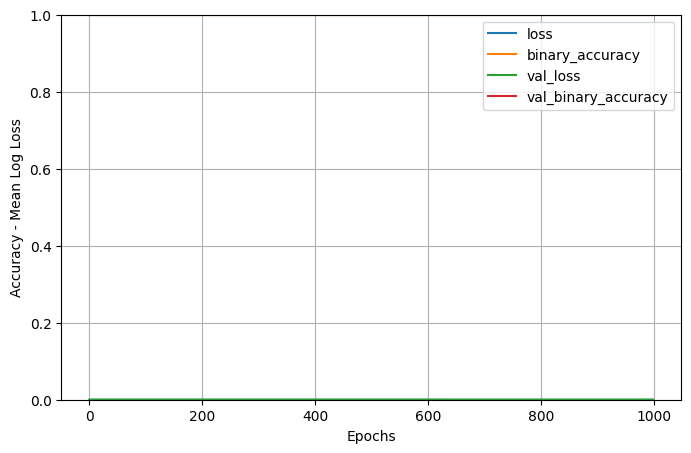

In [14]:
#Obtener los resultados
results=pd.DataFrame(history.history)
results.plot(figsize=(8, 5))
plt.grid(True)
plt.xlabel ("Epochs")
plt.ylabel ("Accuracy - Mean Log Loss")
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.savefig(f"./images/loss{n_neurons_per_hlayer}.png")
plt.show()

In [15]:
print ("Accuracy for the training set: ", results.binary_accuracy.values[-1:][0])
print ("Accuracy for the development test set: ", results.val_binary_accuracy.values[-1:][0])

Accuracy for the training set:  1.0
Accuracy for the development test set:  1.0


In [16]:
#Validar el modelo
dev_predictions=model.predict(X_val).round(2)
dev_predictions[:20]

114/114 [==============================] - 1s 3ms/step


array([[0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.]], dtype=float32)

In [ ]:
dev_rounded_predictions=np.round(dev_predictions)
indices = np.argmax(dev_predictions,1)
for row, index in zip(dev_rounded_predictions, indices): row[index]=1
dev_rounded_predictions[:20]

In [18]:
y_val[:20]

23503    0
27756    1
16166    1
27253    1
21362    0
18392    1
26263    0
28243    1
5536     0
3143     1
2864     1
2273     1
32521    1
3474     1
30457    1
13339    1
15933    1
6773     1
24240    0
12542    0
Name: booking_status, dtype: int64

In [20]:
dev_correct_predictions = np.equal(np.argmax(dev_rounded_predictions,1),np.argmax(y_val,1))
print (dev_correct_predictions[:30])

ValueError: `axis` must be fewer than the number of dimensions (1)

In [ ]:
from collections import Counter
Counter (dev_correct_predictions)